In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
con = sqlite3.connect("accident_data_v1.0.0_2023.db")
cur = con.cursor()

# Exploratorary Data Analysis
This includes simple approaches such as checking for null rows, duplicated data etc Then we utilize data manipulation skills like fillna, replace etc

In [8]:
#Quering the accident table
accident_que = "SELECT * FROM accident"
accident_total = pd.read_sql(accident_que, con)

#Quering the Casualty Table
casaulty_que = "SELECT * FROM casualty"
casualty_total = pd.read_sql(casaulty_que, con)

#Quering the vehicle table
vehicle_que = "SELECT * FROM vehicle"
vehicle_total = pd.read_sql(vehicle_que, con)



In [7]:
accident_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461352 entries, 0 to 461351
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               461352 non-null  object 
 1   accident_year                                461352 non-null  int64  
 2   accident_reference                           461352 non-null  object 
 3   location_easting_osgr                        461236 non-null  float64
 4   location_northing_osgr                       461236 non-null  float64
 5   longitude                                    461226 non-null  float64
 6   latitude                                     461226 non-null  float64
 7   police_force                                 461352 non-null  int64  
 8   accident_severity                            461352 non-null  int64  
 9   number_of_vehicles                           461352 non-nul

In [11]:
casualty_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600332 entries, 0 to 600331
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      600332 non-null  int64 
 1   accident_index                      600332 non-null  object
 2   accident_year                       600332 non-null  int64 
 3   accident_reference                  600332 non-null  object
 4   vehicle_reference                   600332 non-null  int64 
 5   casualty_reference                  600332 non-null  int64 
 6   casualty_class                      600332 non-null  int64 
 7   sex_of_casualty                     600332 non-null  int64 
 8   age_of_casualty                     600332 non-null  int64 
 9   age_band_of_casualty                600332 non-null  int64 
 10  casualty_severity                   600332 non-null  int64 
 11  pedestrian_location                 600

In [12]:
vehicle_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849091 entries, 0 to 849090
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     849091 non-null  int64 
 1   accident_index                    849091 non-null  object
 2   accident_year                     849091 non-null  int64 
 3   accident_reference                849091 non-null  object
 4   vehicle_reference                 849091 non-null  int64 
 5   vehicle_type                      849091 non-null  int64 
 6   towing_and_articulation           849091 non-null  int64 
 7   vehicle_manoeuvre                 849091 non-null  int64 
 8   vehicle_direction_from            849091 non-null  int64 
 9   vehicle_direction_to              849091 non-null  int64 
 10  vehicle_location_restricted_lane  849091 non-null  int64 
 11  junction_location                 849091 non-null  int64 
 12  sk

In [15]:
accident_total.isna().sum()accident_total

accident_index                                   0
accident_year                                    0
accident_reference                               0
location_easting_osgr                          116
location_northing_osgr                         116
longitude                                      126
latitude                                       126
police_force                                     0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number                                0
road_type                      

In [16]:
casualty_total.isna().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

In [17]:
vehicle_total.isna().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

# Replacing the missing entries in the 'location_easting_osgr' and 'location_northing_osgr' columns with the mean of the columns
# Replacing the missing entries in the'longitude', 'latitude' columns with the mode of the respective columns


In [20]:
accident_total.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_year,461352.0,2018.368378,1.091566,2017.000000,2017.000000,2018.000000,2019.000000,2.020000e+03
location_easting_osgr,461236.0,452593.115756,94822.718705,64084.000000,388539.000000,459198.500000,529290.000000,6.553910e+05
location_northing_osgr,461236.0,280180.282096,151550.132556,10235.000000,175530.000000,220865.000000,386551.000000,1.209512e+06
longitude,461226.0,-1.246998,1.389702,-7.525273,-2.172668,-1.126264,-0.136389,1.759641e+00
latitude,461226.0,52.408849,1.365101,49.912362,51.465689,51.870257,53.372899,6.076372e+01
police_force,461352.0,28.193388,24.801609,1.000000,5.000000,22.000000,45.000000,9.900000e+01
accident_severity,461352.0,2.784436,0.443648,1.000000,3.000000,3.000000,3.000000,3.000000e+00
number_of_vehicles,461352.0,1.840441,0.709869,1.000000,1.000000,2.000000,2.000000,2.400000e+01
number_of_casualties,461352.0,1.301245,0.746398,1.000000,1.000000,1.000000,1.000000,5.900000e+01
day_of_week,461352.0,4.108171,1.927216,1.000000,2.000000,4.000000,6.000000,7.000000e+00


In [21]:
columns_1 = ['location_easting_osgr', 'location_northing_osgr']  # Replace with your column names
column_mean_1 = accident_total[columns_1].mean()

accident_total[columns_1] = accident_total[columns_1].fillna(column_mean_1)


In [26]:
columns_2 = ['latitude', 'longitude']  # Replace with your column names
column_mode_2 = accident_total[columns_2].mode().iloc[0]

accident_total[columns_2] = accident_total[columns_2].fillna(column_mode_2)


In [27]:
accident_total.isna().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

In [28]:
#analysing accidents in 2020 by the hours of the day

max_acc = '''SELECT time, COUNT(accident_index) AS Count_of_accident 
                FROM accident
                GROUP BY time
                ORDER BY Count_of_accident DESC LIMIT 50 '''

time_by_acc=pd.read_sql(max_acc, con)
time_by_acc

,time,Count_of_accident
0,17:00,4440
1,17:30,4052
2,18:00,3997
3,16:00,3984
4,15:30,3823
5,16:30,3676
6,15:00,3652
7,18:30,3310
8,08:30,3192
9,14:00,3148


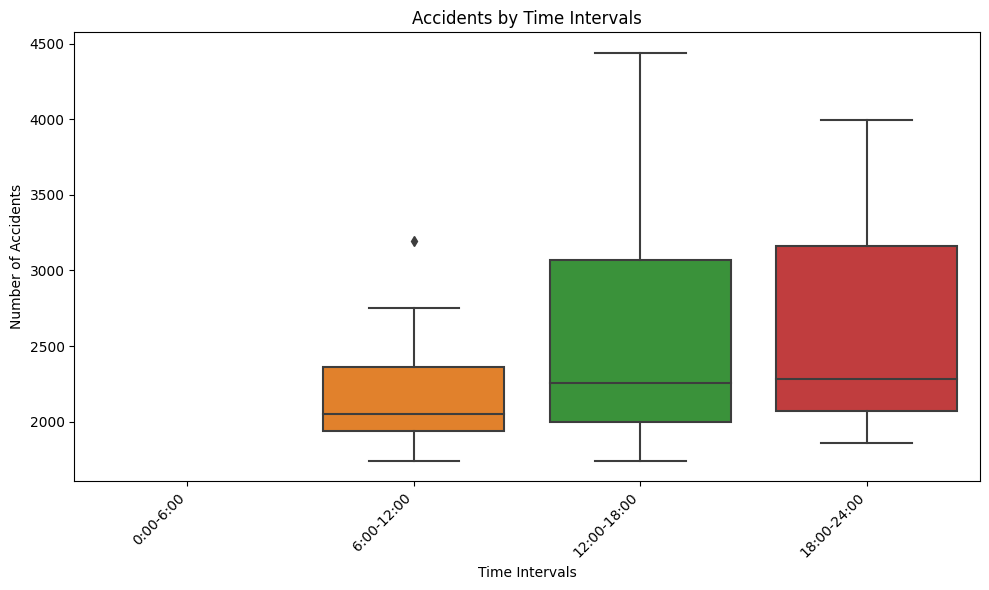

In [29]:
# Extract the hour component from the 'time' column and convert it to integers
time_by_acc['hour'] = time_by_acc['time'].apply(lambda x: int(x.split(':')[0]))

# Define the time intervals for grouping
time_intervals = [0, 6, 12, 18, 24]  # 0-6, 6-12, 12-18, 18-24

# Create labels for the time intervals
time_labels = ['{}:00-{}:00'.format(start, end) for start, end in zip(time_intervals[:-1], time_intervals[1:])]

# Use the pandas cut function to categorize the 'hour' column into the specified intervals
time_by_acc['time_intervals'] = pd.cut(time_by_acc['hour'], bins=time_intervals, labels=time_labels, right=False)

# Plotting the data as a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_intervals', y='Count_of_accident', data=time_by_acc)

# Customizing the plot
plt.xlabel('Time Intervals')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Time Intervals')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


# Analysing Accidents involving pedestrains

In [32]:
#Hours of the DAY for pedestrains

ped_hour = '''SELECT accident.time, COUNT(accident.accident_index) AS Count_of_accident 
                FROM accident 
                JOIN casualty ON accident.accident_index = casualty.accident_index
                WHERE casualty.casualty_type == 3 
                GROUP BY accident.time
                ORDER BY Count_of_accident DESC LIMIT 50'''

ped_hour_acc=pd.read_sql(ped_hour, con)
ped_hour_acc

,time,Count_of_accident
0,17:00,307
1,17:30,302
2,18:00,274
3,18:30,254
4,16:00,249
5,19:00,232
6,16:30,224
7,15:30,219
8,15:00,198
9,20:00,193


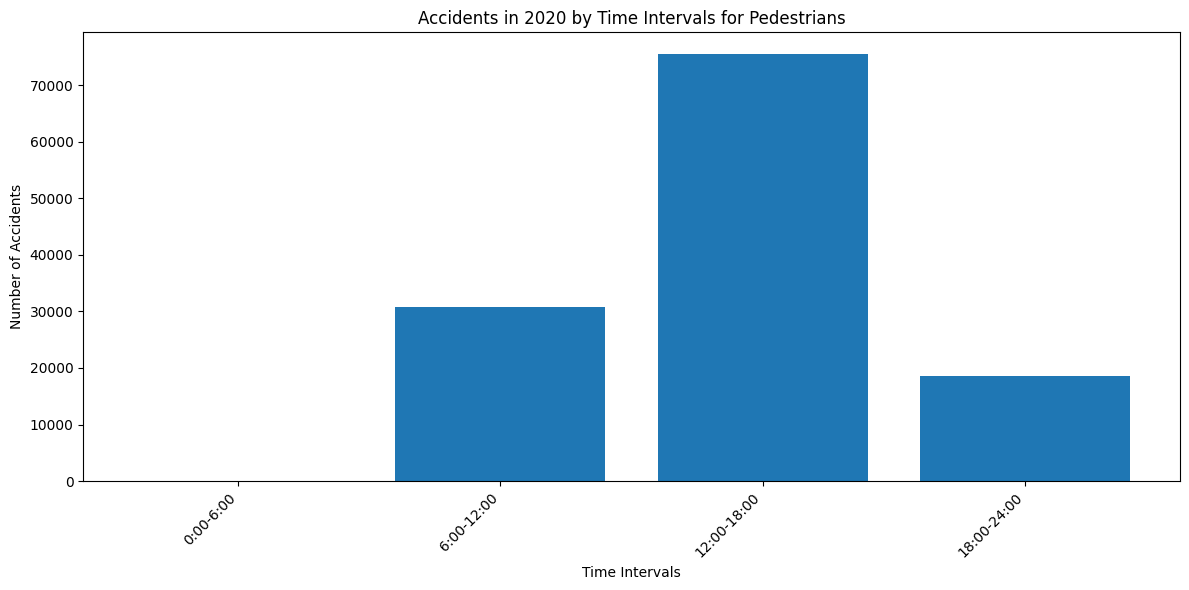

In [33]:
#Visualizing the HOURS of the DAY that  Pedestrains have accidents the most


# Extract the hour component from the 'time' column and convert it to integers
ped_hour_acc['hour'] = ped_hour_acc['time'].apply(lambda x: int(x.split(':')[0]))

# Define the time intervals for grouping
time_intervals = [0, 6, 12, 18, 24]  # 0-6, 6-12, 12-18, 18-24

# Create labels for the time intervals
time_labels = ['{}:00-{}:00'.format(start, end) for start, end in zip(time_intervals[:-1], time_intervals[1:])]

# Use the pandas cut function to categorize the 'hour' column into the specified intervals
ped_hour_acc['time_intervals'] = pd.cut(ped_hour_acc['hour'], bins=time_intervals, labels=time_labels, right=False)

grouped_data = time_by_acc.groupby('time_intervals')['Count_of_accident'].sum().reset_index()


# Plotting the data as a boxplot
plt.figure(figsize=(12, 6))
plt.bar(grouped_data['time_intervals'], grouped_data['Count_of_accident'])

# Customizing the plot
plt.xlabel('Time Intervals')
plt.ylabel('Number of Accidents')
plt.title('Accidents in 2020 by Time Intervals for Pedestrians')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

# Apriori Algorithm - Data Pattern Mining
In order to run Apriori Algorithms for the data in the year 2020, we need to select specific features from each table from which patterns can be identified and then we can analyse the impact of these features on the accident severity.
specific columns are selected from the accident, vehicle and casualty tables and then they are merged together and then One-Hot Endcoding is implemented in order to make they suitable for the apriori algorithms. The Aim of the Apriori algorithm is to analyse what feature factors most influence the severity levels of accidents in the year 2020.

In [36]:
#Filtering the data for the year 2020

acc_2020 = accident_total[accident_total["accident_year"]==2020].copy()
casualty_2020 = casualty_total[casualty_total["accident_year"]==2020]
vehicle_2020 = vehicle_total[vehicle_total["accident_year"]==2020]

In [37]:
acc_feat = acc_2020[['accident_index', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'road_type', 'speed_limit', 'light_conditions', 
                    'weather_conditions', 'road_surface_conditions', 'lsoa_of_accident_location', 'police_force']]


veh_feat = vehicle_2020[['accident_index', 'vehicle_type', 'sex_of_driver', 'age_of_driver', 'engine_capacity_cc', 'age_of_vehicle' ]]

casua_feat = casualty_2020[['accident_index', 'casualty_class', 'sex_of_casualty', 'age_of_casualty', 'pedestrian_location']]

In [38]:
#merging these three different dataframes together

acc_veh = acc_feat.merge(veh_feat, on = 'accident_index')

total_feat = acc_veh.merge(casua_feat, on ='accident_index')

total_feat.shape

(220435, 20)

### in order to execute the Apriori Algorithms, we need to implement One-Hot Encoding, and we cannot implement one-hot encodings for uncategorical data. so we had to drop certain columns

In [43]:
x = total_feat.drop(['accident_index', 'speed_limit', 'number_of_vehicles', 'lsoa_of_accident_location', 'age_of_vehicle', 'engine_capacity_cc', 'age_of_casualty', 'age_of_vehicle', 'police_force'], axis=1)

# One_Hot Encoding
def encoding (x):
    if x<=1:
        return 0
    else:
        return 1
    
    
x_encoded = x.applymap(encoding)
x_encoded.head()

,accident_severity,number_of_casualties,road_type,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,sex_of_driver,age_of_driver,casualty_class,sex_of_casualty,pedestrian_location
0,1,0,1,0,1,1,1,1,1,1,0,1
1,1,1,1,0,0,0,1,0,1,1,1,0
2,1,1,1,0,0,0,1,0,1,1,1,0
3,1,0,1,1,0,1,1,1,0,1,0,1
4,1,0,1,1,0,0,1,0,1,1,0,1


In [44]:
#Importing Apriori Rules

from mlxtend.frequent_patterns import apriori, association_rules

In [45]:
freq_feat = apriori(x_encoded, min_support = 0.05, use_colnames=True)

freq_feat

C:\Users\OMOJOLA OLUWAFEMI\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.980806,(accident_severity)
1,0.403620,(number_of_casualties)
2,0.943661,(road_type)
3,0.289396,(light_conditions)
4,0.219108,(weather_conditions)
...,...,...
636,0.072139,"(road_type, accident_severity, age_of_driver, ..."
637,0.073886,"(road_type, accident_severity, age_of_driver, ..."
638,0.060934,"(road_type, accident_severity, road_surface_co..."
639,0.054420,"(road_type, accident_severity, road_surface_co..."


In [46]:
pd.set_option("max_colwidth", None)

# Printing out the entire association rules with the confidence as the metric
apriori_rules = association_rules(freq_feat, metric='confidence', min_threshold = 0.7)

apriori_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(number_of_casualties),(accident_severity),0.403620,0.980806,0.391281,0.969429,0.988400,-0.004592,0.627837,-0.019300
1,(road_type),(accident_severity),0.943661,0.980806,0.924685,0.979891,0.999067,-0.000864,0.954490,-0.016307
2,(accident_severity),(road_type),0.980806,0.943661,0.924685,0.942781,0.999067,-0.000864,0.984612,-0.046401
3,(light_conditions),(accident_severity),0.289396,0.980806,0.282129,0.974888,0.993966,-0.001713,0.764316,-0.008471
4,(weather_conditions),(accident_severity),0.219108,0.980806,0.215161,0.981987,1.001204,0.000259,1.065568,0.001540
...,...,...,...,...,...,...,...,...,...,...
2715,"(sex_of_driver, road_type, road_surface_conditions, sex_of_casualty)","(age_of_driver, accident_severity, vehicle_type)",0.063461,0.781763,0.050654,0.798199,1.021023,0.001043,1.081443,0.021986
2716,"(sex_of_driver, accident_severity, road_surface_conditions, sex_of_casualty)","(road_type, age_of_driver, vehicle_type)",0.066423,0.757634,0.050654,0.762601,1.006556,0.000330,1.020922,0.006977
2717,"(sex_of_driver, age_of_driver, road_surface_conditions, sex_of_casualty)","(road_type, accident_severity, vehicle_type)",0.057509,0.853821,0.050654,0.880808,1.031607,0.001552,1.226415,0.032508
2718,"(sex_of_driver, vehicle_type, road_surface_conditions, sex_of_casualty)","(road_type, accident_severity, age_of_driver)",0.064064,0.808306,0.050654,0.790681,0.978195,-0.001129,0.915798,-0.023263


In [47]:
# Filter the association rules where 'accident_severity' is in the consequent
filtered_rules = apriori_rules[apriori_rules['consequents'].apply(lambda consequent: 'accident_severity' in consequent)]

filtered_rules['antecedents_len'] = filtered_rules["antecedents"].apply(lambda c: len(c))


#filter the entire dataframe by the antecedents to show only one antecedent at a time. 
filtered_rules_df=filtered_rules[ (filtered_rules['antecedents_len'] ==1)]
filtered_rules_df[['antecedents', 'consequents', 'confidence', 'lift']].head(15)

,antecedents,consequents,confidence,lift
0,(number_of_casualties),(accident_severity),0.969429,0.988400
1,(road_type),(accident_severity),0.979891,0.999067
3,(light_conditions),(accident_severity),0.974888,0.993966
4,(weather_conditions),(accident_severity),0.981987,1.001204
5,(road_surface_conditions),(accident_severity),0.977156,0.996279
7,(vehicle_type),(accident_severity),0.979978,0.999156
8,(sex_of_driver),(accident_severity),0.988400,1.007743
9,(age_of_driver),(accident_severity),0.978914,0.998070
11,(casualty_class),(accident_severity),0.975070,0.994152
12,(sex_of_casualty),(accident_severity),0.985923,1.005217


# Results:
Confidence is a measure of how often the rule X  Y has been found to be true. It is defined
as the proportion of occurrences containing X that also contain Y. High confidence suggests a
strong relationship between X and Y. The lift is a measure of the strength of association
between X and Y. A lift value greater than one suggests the occurrence of X increases the
likelihood of Y while a lift value less than one indicates a negative association between X and
Y. 

The sex of driver, sex of casualty and the weather conditions have the highest confidence and they also
have lifts greater than 1, which shows the level of impact these features has on the accident
severity.